In [181]:
from gym.envs.toy_text.frozen_lake import generate_random_map
import hiivemdptoolbox.hiive.mdptoolbox as mdp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gym
import time
import sys

# Small Problem

In [182]:
actions = ['L', 'D', 'R', 'U']
random_map = generate_random_map(size=20, p=.97)

P, R = mdp.example.openai('FrozenLake-v1', render=False, desc=random_map, is_slippery=True)
env = gym.make('FrozenLake-v1', desc=random_map, render_mode='', is_slippery=True)

C:\Users\legen\anaconda3\envs\ml\lib\site-packages\gym\envs\registration.py:623: UserWarning: WARN: The environment is being initialised with mode () that is not in the possible render_modes (['human', 'ansi', 'rgb_array']).
  logger.warn(


In [183]:
def run_simulation(policy, env):
    env.reset()
    new_state=0
    for i in range(1000):
        action = policy[new_state]
        new_state, reward, done, other, info = env.step(action)
        if done and reward == 1:
            return i
        if done and reward == 0:
            return 2000
    return 1000

In [184]:
def callback(s, a, s_new):
    global i
    if i % 1000 == 0:
#         print(i, s, a, s_new)
        pass
    i += 1
    return True

In [185]:
def visualize_policy(policy, size, desc, name):
    ar = np.reshape([actions[x] for x in policy], (size, size))
    arrows = {"R":(1,0), "L":(-1,0),"U":(0,1),"D":(0,-1)}
    scale = .25
    for r, row in enumerate(ar):
        for c, cell in enumerate(row):
            color = 'black'
            if desc[r][c] == 'S':
                color = 'blue'
            elif desc[r][c] == 'G':
                color = 'green'
            elif desc[r][c] == 'H':
                color = 'red'
            plt.arrow(
                c, 
                5 - r, 
                scale*arrows[cell][0], 
                scale*arrows[cell][1], 
                head_width=.3, 
                color=color
            )
    plt.savefig(name, format='png')
    plt.show()
    

In [186]:
visualize_policy(vi.policy, 10, random_map)

TypeError: visualize_policy() missing 1 required positional argument: 'name'

### Value Iteration

In [187]:
plot_df = pd.DataFrame(index=range(200))
start = time.time()
vi = mdp.mdp.ValueIteration(P, R, .999, max_iter=1000000, epsilon=.000001)
run_time = time.time() - start
results = vi.run()
print(sys.getsizeof(vi))
print(run_time)

vi_mean_v = [x['Mean V'] for x in results]
vi_error = [x['Error'] for x in results]
vi_time = [x['Time'] for x in results]
vi_reward = [x['Reward'] for x in results]

48
0.003002643585205078


<AxesSubplot:>

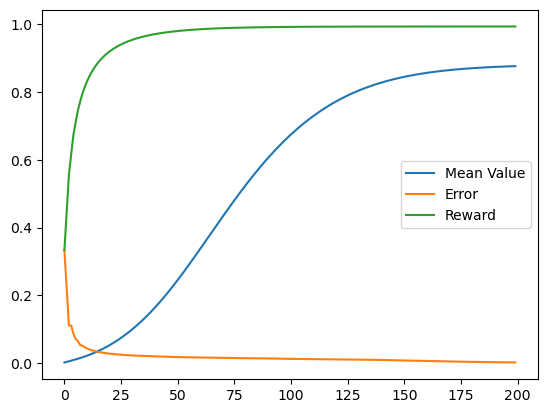

In [188]:
plot_df['Mean Value'] = pd.Series(vi_mean_v)
plot_df['Error'] = pd.Series(vi_error)
plot_df['Reward'] = pd.Series(vi_reward)
plot_df.plot()

<AxesSubplot:>

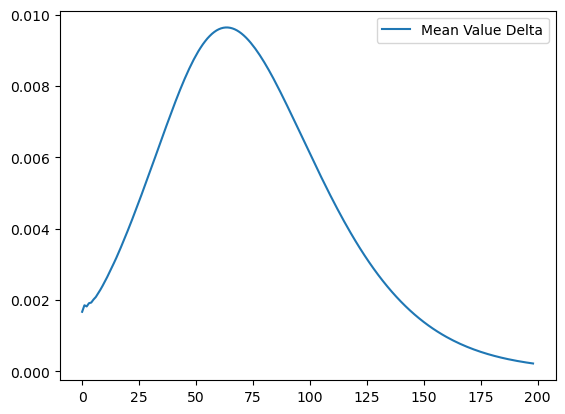

In [189]:
plot_df = pd.DataFrame(index=range(200))

plot_df['Mean Value'] = pd.Series(vi_mean_v)
plot_df['Error'] = pd.Series(vi_error)
plot_df['Mean Value Delta'] = plot_df['Mean Value'].diff().shift(-1)
plot_df = plot_df.drop(['Mean Value', 'Error'], axis=1)
plot_df.plot()

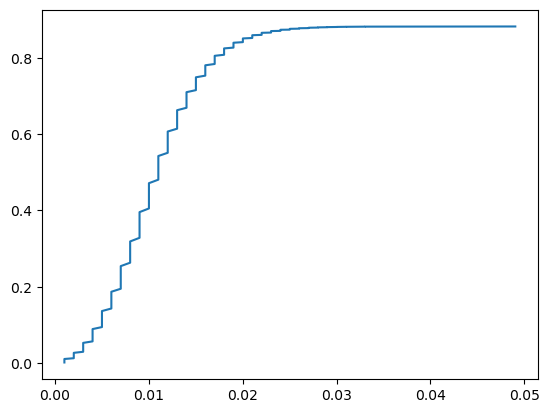

In [190]:
plot_df = pd.DataFrame(index=range(200))

plt.plot(vi_time, vi_mean_v)

#### Gamma Experiments

In [191]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))

times = []

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    times.append([x['Time'] for x in results])

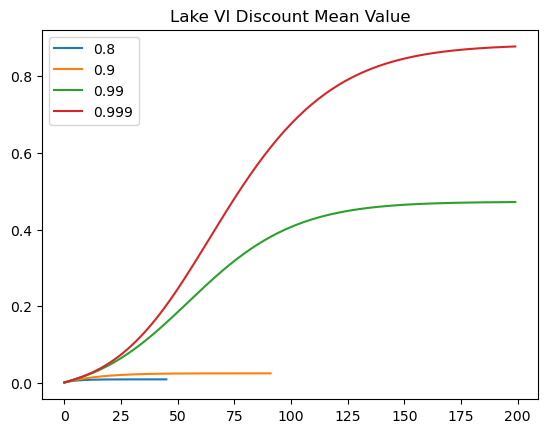

In [192]:
plot_df.plot(title='Lake VI Discount Mean Value')
plt.savefig('lakevidiscountmeanvalue.png', format='png')

In [193]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))

times = []

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Reward'] for x in results])
    times.append([x['Time'] for x in results])

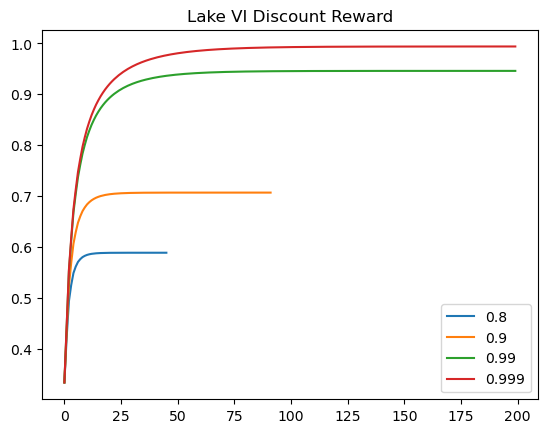

In [194]:
plot_df.plot(title='Lake VI Discount Reward')
plt.savefig('lakevidiscountreward.png', format='png')

In [195]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))

times = []

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

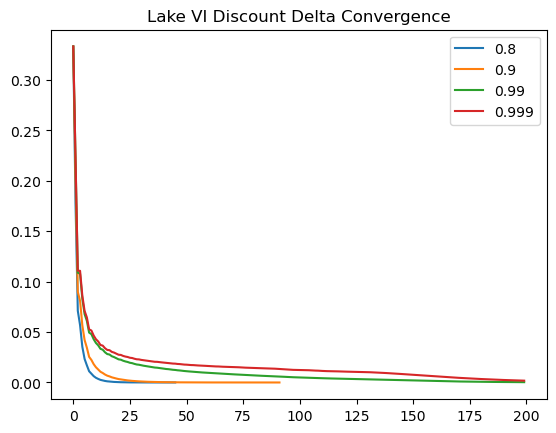

In [196]:
plot_df.plot(title='Lake VI Discount Delta Convergence')
plt.savefig('lakevidiscountdelta.png', format='png')

#### Policy Visualization

In [197]:
# time.sleep(1)
# env.reset()
# env.render()
# new_state=0
# for i in range(1000):
#     action = vi.policy[new_state]
#     print('Desired Action:', actions[action])
#     new_state, reward, done, other, info = env.step(action)
#     print(new_state)
#     print(reward)
#     env.render()
#     if done:
#         break

In [198]:
pd.Series([run_simulation(vi.policy, env) for i in range(5)]).mean()

138.8

In [199]:
visualize_policy(vi.policy, 20, random_map)
plt.savefig('lakevipolicy.png', format='png')

TypeError: visualize_policy() missing 1 required positional argument: 'name'

#### Intermittent Iteration Evaluation

In [243]:
arrows = {"R":(1,0), "L":(-1,0),"U":(0,1),"D":(0,-1)}
scale = 0.25

In [244]:
iterations = [1, 5, 10, 20, 80, 200]
vi_results = []

for max_iteration in iterations:
    vi_run = mdp.mdp.ValueIteration(P, R, 1, max_iter=max_iteration, epsilon=.000001) # Discount set to 1 to look at intermittent steps
    vi_run.run()
    vi_results.append(vi_run)

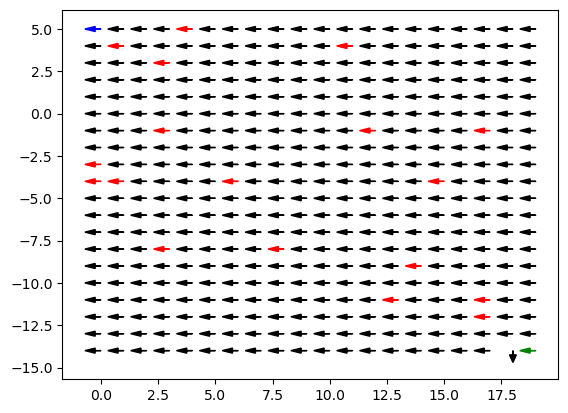

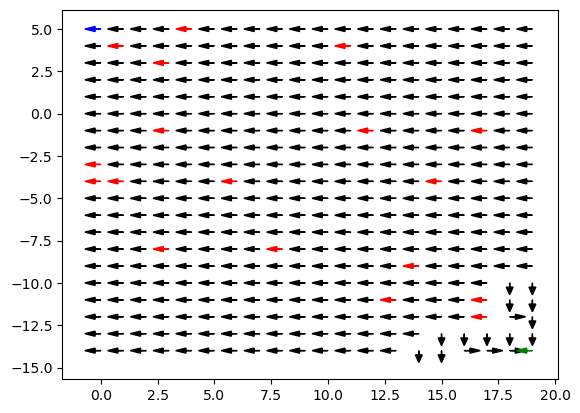

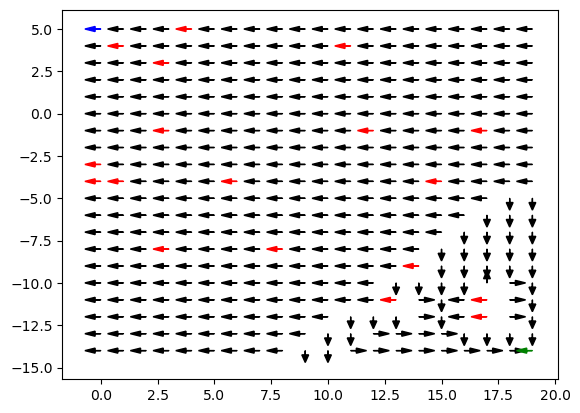

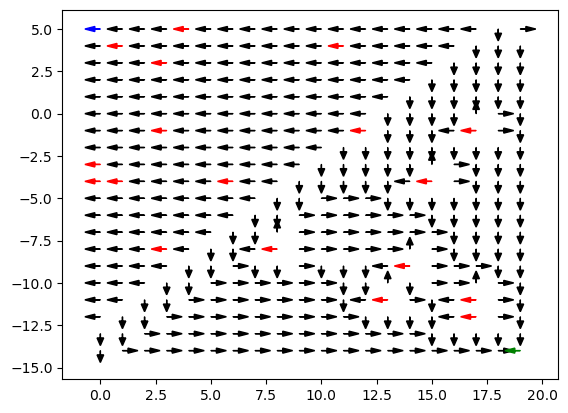

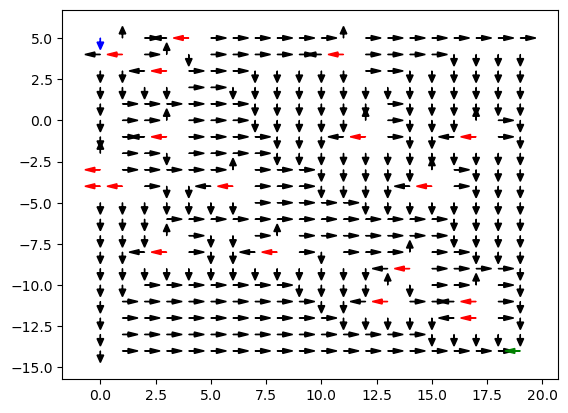

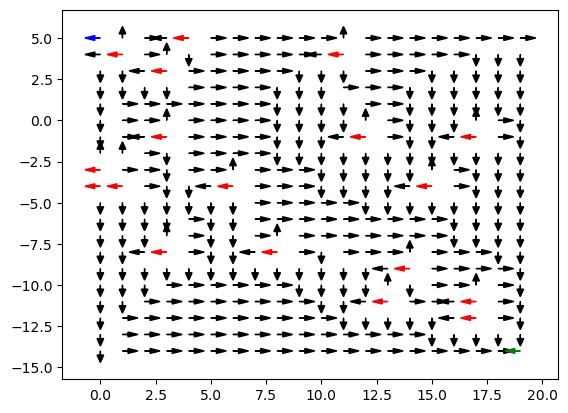

In [245]:
for i, vi_run in enumerate(vi_results):
    visualize_policy(vi_run.policy, 20, random_map, f'lakeviintermittent_{iterations[i]}.png')
    

#### Policy Average Steps

In [200]:
pd.Series([run_simulation(vi.policy, env) for i in range(5)]).mean()

117.4

### Policy Iteration

In [201]:
import time
plot_df = pd.DataFrame(index=range(20))
start = time.time()
pi = mdp.mdp.PolicyIteration(P, R, .999, max_iter=30)
print(time.time() - start)
results = pi.run()


print(sys.getsizeof(pi))

pi_mean_v = [x['Mean V'] for x in results]
pi_error = [x['Error'] for x in results]
pi_time = [x['Time'] for x in results]
pi_reward = [x['Reward'] for x in results]

0.0010013580322265625
48


<AxesSubplot:>

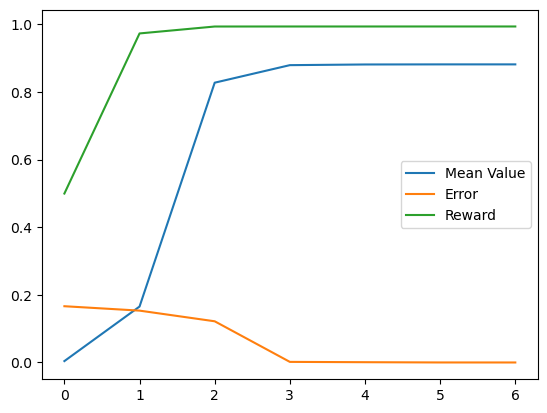

In [202]:
plot_df['Mean Value'] = pd.Series(pi_mean_v)
plot_df['Error'] = pd.Series(pi_error)
plot_df['Reward'] = pd.Series(pi_reward)
plot_df.plot()

<AxesSubplot:>

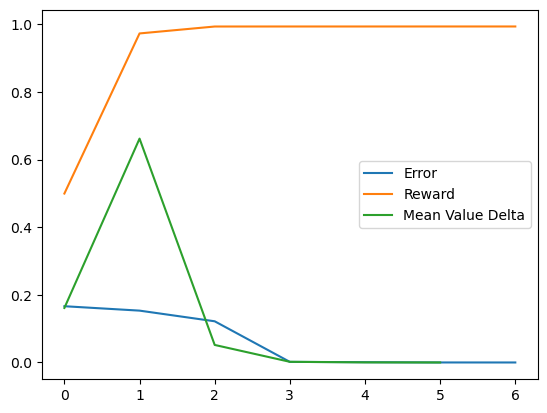

In [203]:
plot_df['Mean Value'] = pd.Series(pi_mean_v)
plot_df['Mean Value Delta'] = plot_df['Mean Value'].diff().shift(-1)
plot_df = plot_df.drop(['Mean Value'], axis=1)
plot_df.plot()

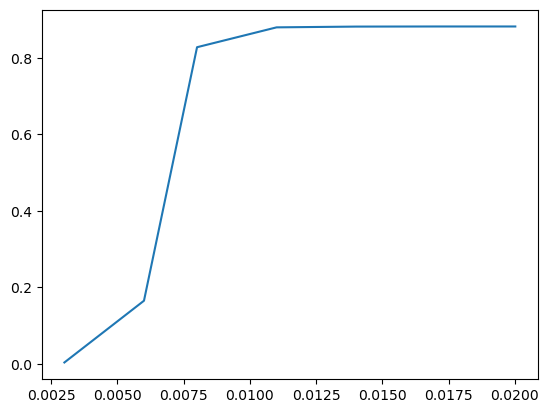

In [204]:
pi_times = [x['Time'] for x in results]
pi_mean_v = [x['Mean V'] for x in results]

plt.plot(pi_times, pi_mean_v)

#### Gamma Experiments

In [205]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(20))

times = []

for i in index:
    vi = mdp.mdp.PolicyIteration(P, R, i, max_iter=30)
    results = vi.run()
    plot_df[i] = pd.Series([x['Reward'] for x in results])
    times.append([x['Time'] for x in results])

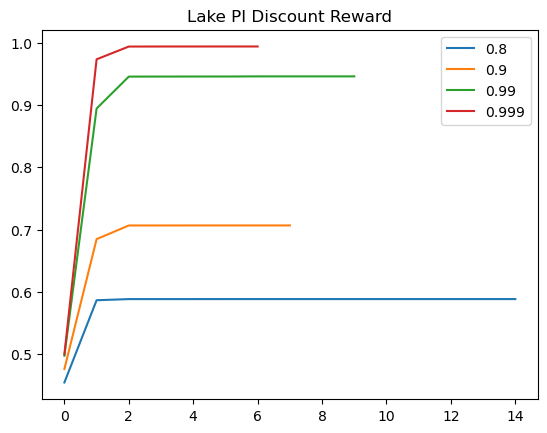

In [206]:
plot_df.plot(title='Lake PI Discount Reward')
plt.savefig('lakepidiscountreward.png', format='png')

In [207]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(20))

for i in index:
    vi = mdp.mdp.PolicyIteration(P, R, i, max_iter=30)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    plot_df[f'{i} Delta'] = plot_df[i].diff().shift(-1)
    plot_df = plot_df.drop([i], axis=1)

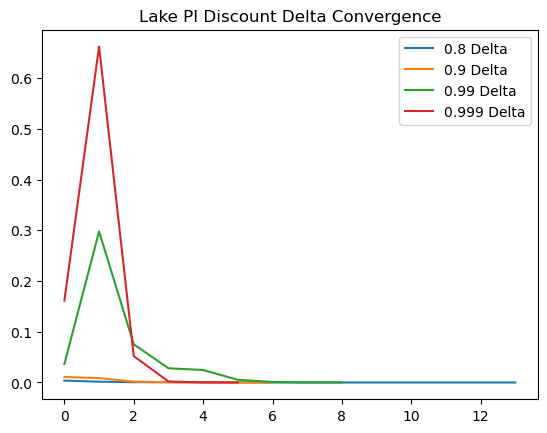

In [208]:
plot_df.plot(title='Lake PI Discount Delta Convergence')
plt.savefig('lakepidiscountdelta.png', format='png')

#### Policy Visualization

In [209]:
# env.reset()
# env.render()
# new_state=0
# for i in range(1000):
#     action = pi.policy[new_state]
#     print('Desired Action:', actions[action])
#     new_state, reward, done, other, info = env.step(action)
#     print(new_state)
#     print(reward)
#     env.render()
#     if done:
#         break

In [210]:
visualize_policy(pi.policy, 20, random_map)
plt.savefig('lakepipolicy.png', format='png')

TypeError: visualize_policy() missing 1 required positional argument: 'name'

#### Intermittent Iteration Evaluation

In [241]:
iterations = [1, 2, 3, 4, 5, 10]
pi_results = []

for max_iteration in iterations:
    pi_run = mdp.mdp.PolicyIteration(P, R, .999, max_iter=max_iteration) # Discount set to 1 to look at intermittent steps
    pi_run.run()
    pi_results.append(pi_run)

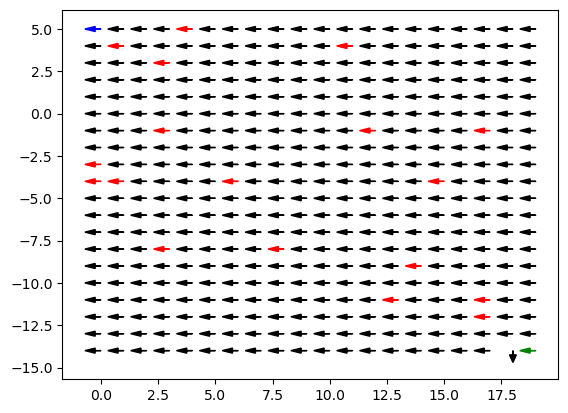

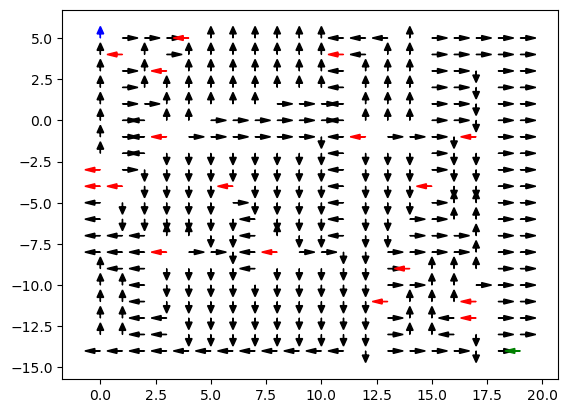

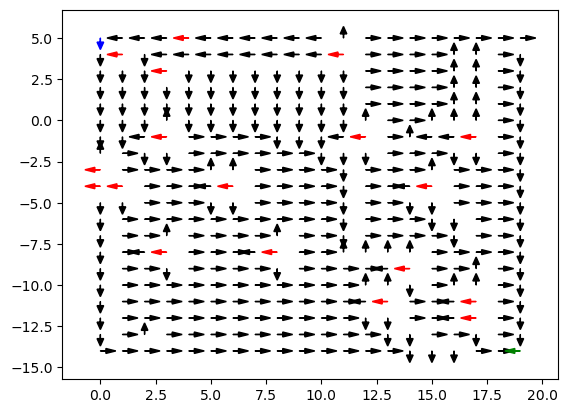

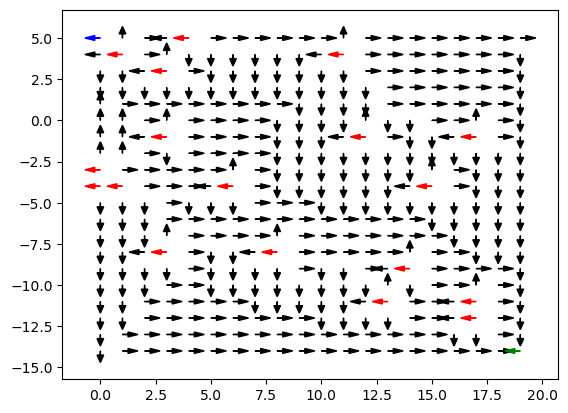

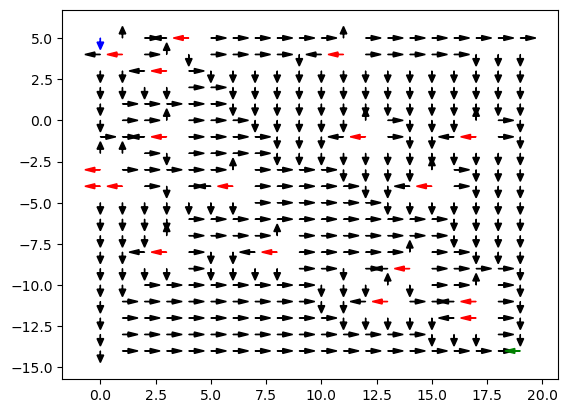

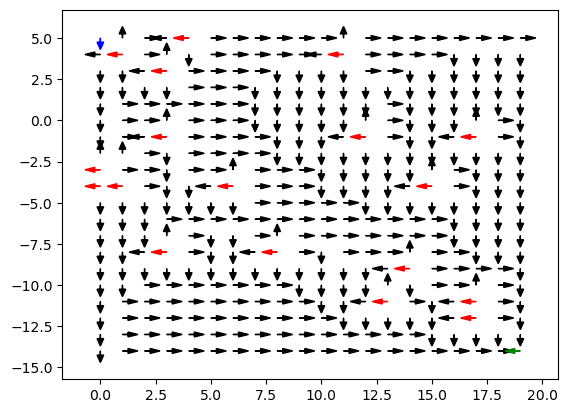

In [242]:
for i, pi_run in enumerate(pi_results):
    visualize_policy(pi_run.policy, 20, random_map, f'lakepiintermittent_{iterations[i]}.png')

#### Policy Iterations Average

In [211]:
pd.Series([run_simulation(pi.policy, env) for i in range(5)]).mean()

150.4

### Q Learning

In [212]:
import time
plot_df = pd.DataFrame(index=range(1000000))
start = time.time()
ql = mdp.mdp.QLearning(
    P, 
    R, 
    .95,
    alpha=.1,
    alpha_decay=.99999,
    alpha_min=.001,
    epsilon=1,
    epsilon_min=.01,
    epsilon_decay=.99997,
    n_iter=400000,
    run_stat_frequency=1,
    iter_callback=callback
)
results = ql.run()
print(time.time() - start)

print(sys.getsizeof(ql))

print('Mean Value:', results[-1]['Mean V'])

ql_mean_v = [x['Mean V'] for x in results]
ql_error = [x['Error'] for x in results]
ql_time = [x['Time'] for x in results]

42.52812671661377
48
Mean Value: 0.01785434747789668


In [213]:
sys.getsizeof(ql.Q)

12920

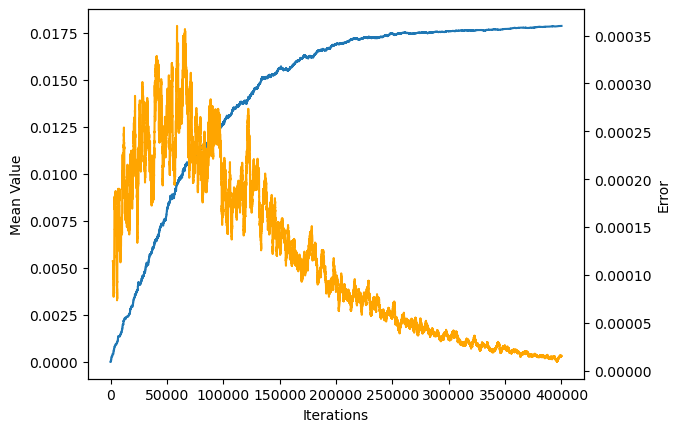

In [214]:
plot_df['Mean Value'] = pd.Series(ql_mean_v)
plot_df['Error'] = pd.Series(ql_error).rolling(2000).mean()

fig, ax = plt.subplots()
ax.plot(plot_df['Mean Value'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean Value')

ax2 = ax.twinx()
ax2.plot(plot_df['Error'], color='orange')
ax2.set_ylabel('Error')
plt.show()

In [215]:
# env.reset()
# env.render()
# new_state=0
# for i in range(1000):
#     action = ql.policy[new_state]
#     print('Desired Action:', actions[action])
#     new_state, reward, done, other, info = env.step(action)
#     print(new_state)
#     print(reward)
#     env.render()
#     if done:
#         break

#### HP Tuning 

##### Discount

In [216]:
index = [.8, .9, .95, .99, .999]

plot_df = pd.DataFrame()
error_df = pd.DataFrame()
reward_df = pd.DataFrame()

times = []
policies = []
for gamma in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        gamma,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.01,
        epsilon=1.0,
        epsilon_min=.5,
        epsilon_decay=.999,
        n_iter=200000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[gamma] = pd.Series([x['Reward'] for x in results])
    plot_df[gamma] = pd.Series([x['Mean V'] for x in results])
    error_df[gamma] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

21.31113028526306
21.170385360717773
21.238703966140747
21.154792070388794
21.186334371566772


In [217]:
plot_df.head()

0.800  0.900  0.950  0.990  0.999
0    0.0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0    0.0
4    0.0    0.0    0.0    0.0    0.0

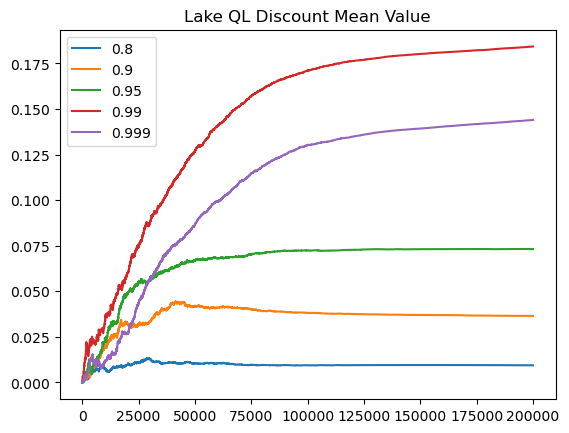

In [218]:
plot_df.plot(title='Lake QL Discount Mean Value')
plt.savefig(f'lakeqldiscountmeanvalue.png', format='png')

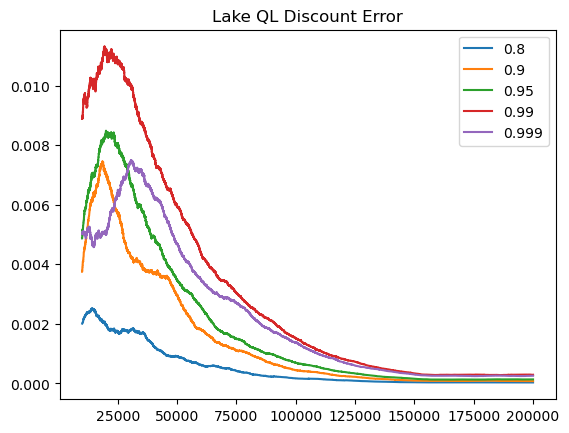

In [219]:
error_df.rolling(10000).mean().plot(title='Lake QL Discount Error')
plt.savefig(f'lakeqldiscountdelta.png', format='png')

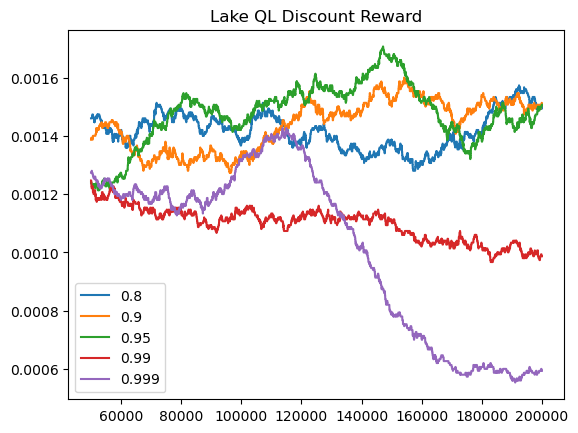

In [220]:
reward_df.rolling(50000).mean().plot(title='Lake QL Discount Reward')
plt.savefig(f'lakeqldiscountreward.png', format='png')

0.8


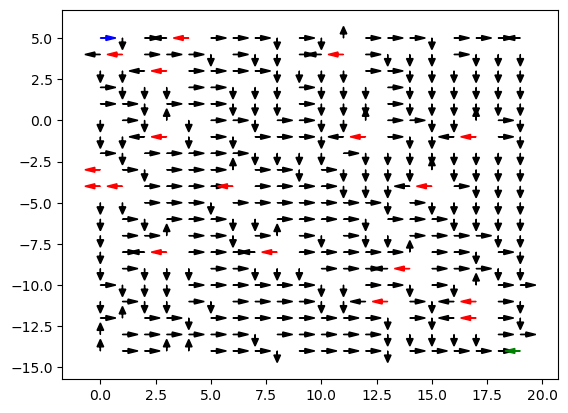

0.9


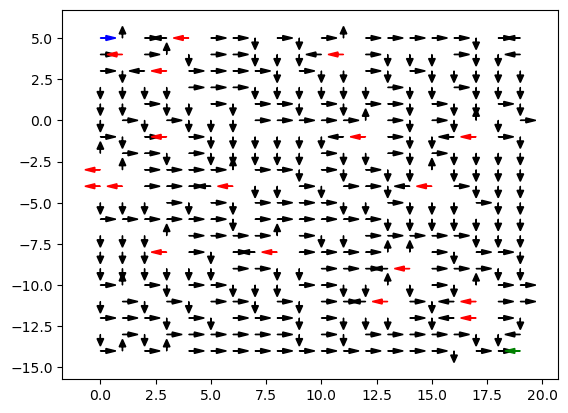

0.95


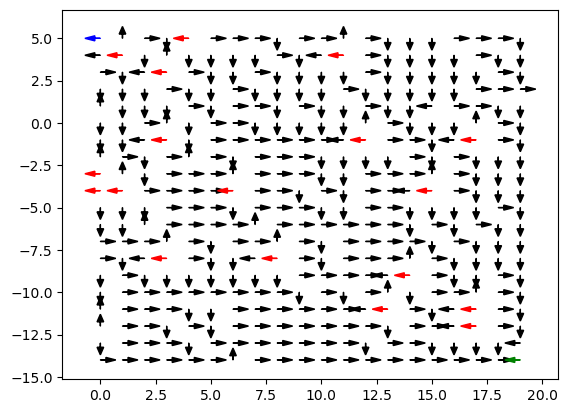

0.99


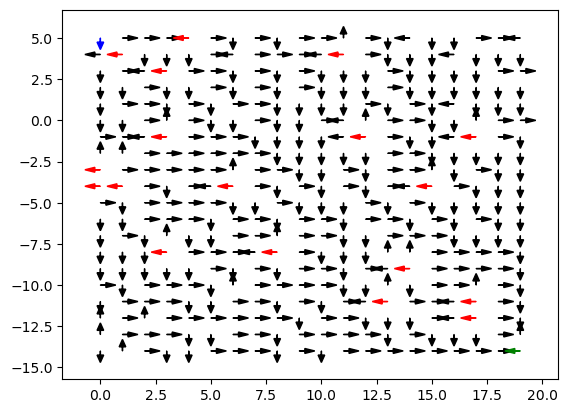

0.999


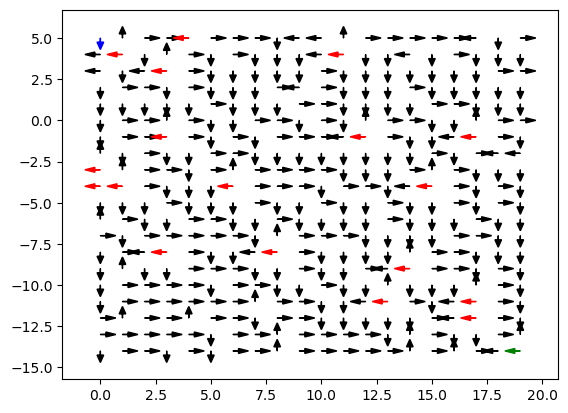

In [221]:
for value, policy in zip(index, policies):
    print(value)
    visualize_policy(policy, 20, random_map, f'lakeqldiscount_{value}.png')

##### Alpha

In [222]:
index = [.9, .3, .1, .01]

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for i in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=i,
        alpha_decay=.99997,
        alpha_min=.01,
        epsilon=1.0,
        epsilon_min=.5,
        epsilon_decay=.999,
        n_iter=200000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    error_df[i] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

21.309250116348267
21.21920156478882
21.293449640274048
21.242114067077637


<AxesSubplot:>

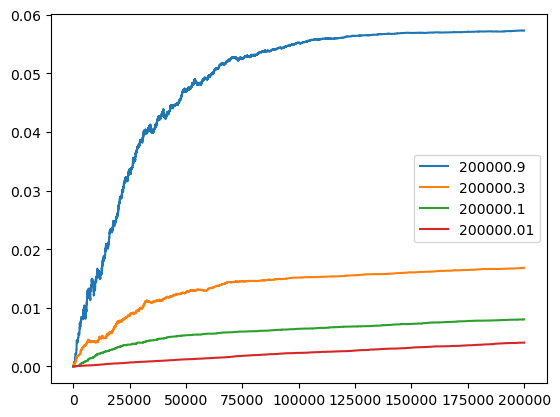

In [223]:
plot_df.plot()

<AxesSubplot:>

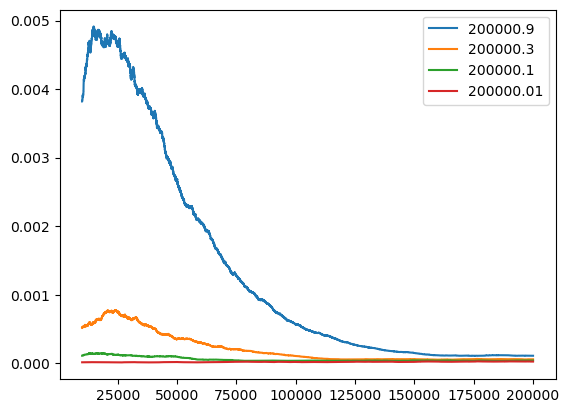

In [224]:
error_df.rolling(10000).mean().plot()

<AxesSubplot:>

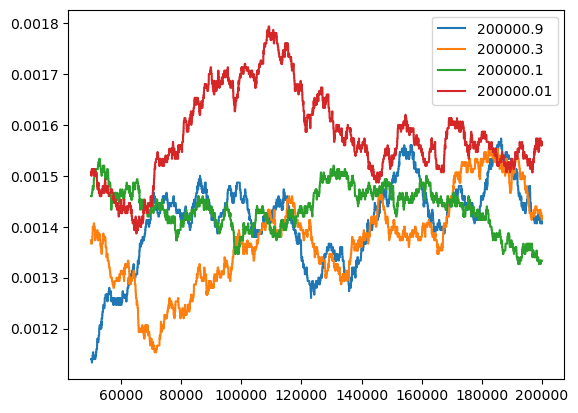

In [225]:
reward_df.rolling(50000).mean().plot()

In [226]:
for value, policy in zip(index, policies):
    print(value)
    visualize_policy(policy, 20, random_map)

0.9


TypeError: visualize_policy() missing 1 required positional argument: 'name'

##### Alpha Min

In [ ]:
index = [.5, .3, .1, .05, .01, .001]

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for i in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=i,
        epsilon=1.0,
        epsilon_min=.5,
        epsilon_decay=.999,
        n_iter=200000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    error_df[i] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

In [ ]:
plot_df.plot()

In [ ]:
error_df.rolling(10000).mean().plot()

In [ ]:
reward_df.rolling(50000).mean().plot()

In [ ]:
for value, policy in zip(index, policies):
    print(value)
    visualize_policy(policy, 20, random_map)

##### Epsilon

In [227]:
index = np.linspace(0, 1, num=4)

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for epsilon in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95, 
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.01,
        epsilon=epsilon,
        epsilon_min=.1,
        epsilon_decay=.99999,
        n_iter=200000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[epsilon] = pd.Series([x['Reward'] for x in results])
    plot_df[epsilon] = pd.Series([x['Mean V'] for x in results])
    error_df[epsilon] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

21.107871532440186
21.162667512893677
21.224887371063232
21.223238945007324


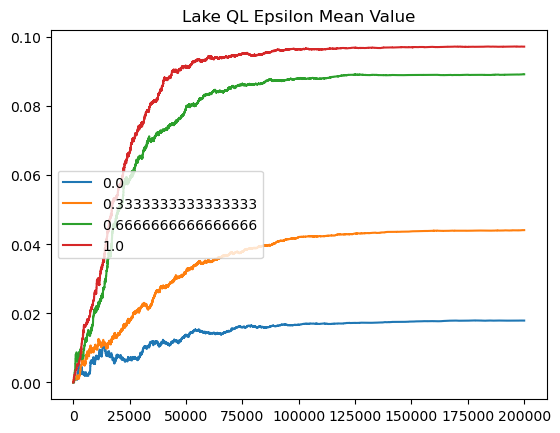

In [228]:
plot_df.plot(title='Lake QL Epsilon Mean Value')
plt.savefig('lakeqlepsilonmeanvalue.png', format='png')

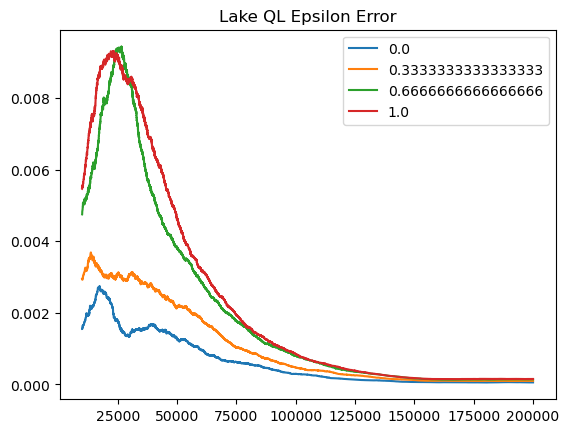

In [229]:
error_df.rolling(10000).mean().plot(title='Lake QL Epsilon Error')
plt.savefig('lakeqlepsilondelta.png', format='png')

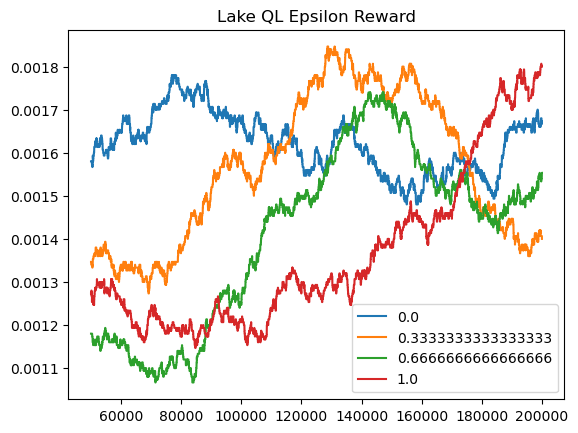

In [230]:
reward_df.rolling(50000).mean().plot(title='Lake QL Epsilon Reward')
plt.savefig('lakeqlepsilonreward.png', format='png')

0.0


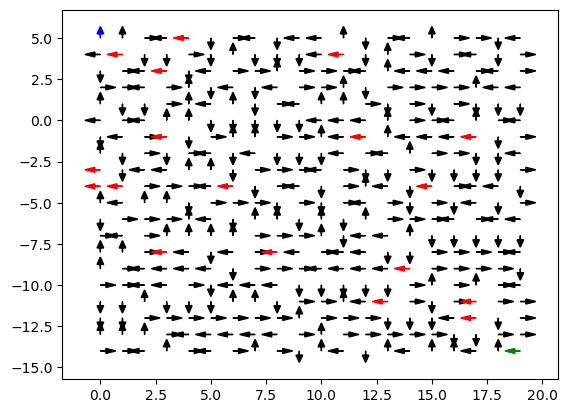

0.3333333333333333


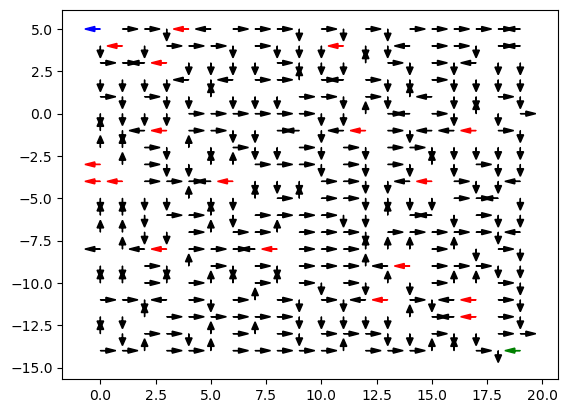

0.6666666666666666


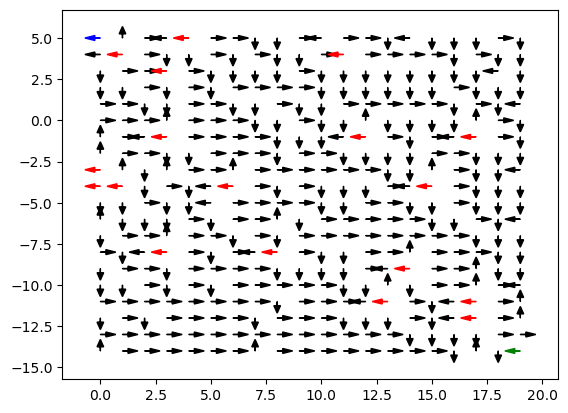

1.0


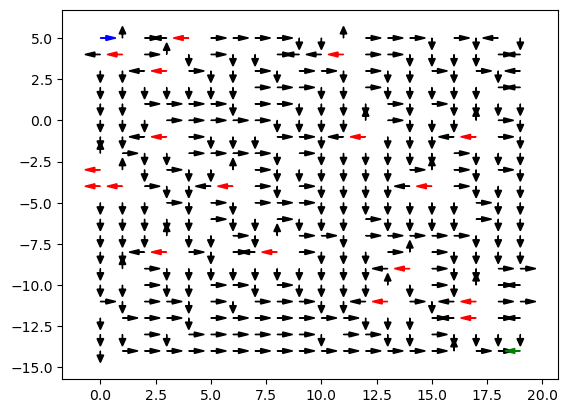

In [231]:
for value, policy in zip(index, policies):
    print(value)
    visualize_policy(policy, 20, random_map, f'lakeqlepsilon_{value}.png')

##### Epsilon Min

In [232]:
index = [1, .5, .1, .01]

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for e_min in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.1,
        epsilon=.33,
        epsilon_min=e_min,
        epsilon_decay=.99999,
        n_iter=200000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[e_min] = pd.Series([x['Reward'] for x in results])
    plot_df[e_min] = pd.Series([x['Mean V'] for x in results])
    error_df[e_min] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

21.16821789741516
21.22212290763855
21.215831518173218
21.583009243011475


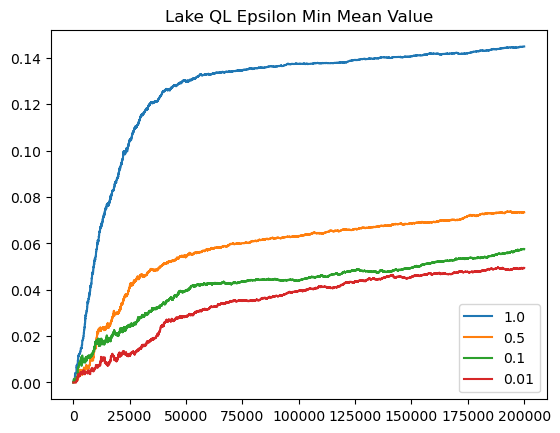

In [233]:
plot_df.plot(title='Lake QL Epsilon Min Mean Value')
plt.savefig('lakeqlepsilonminmeavvalue.png', format='png')

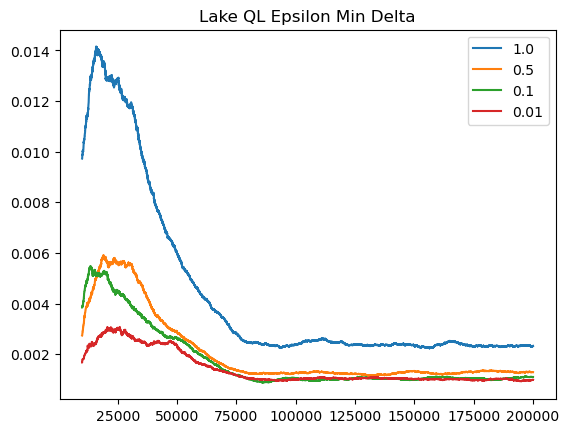

In [234]:
error_df.rolling(10000).mean().plot(title='Lake QL Epsilon Min Delta')
plt.savefig('lakeqlepsilonmindelta.png', format='png')

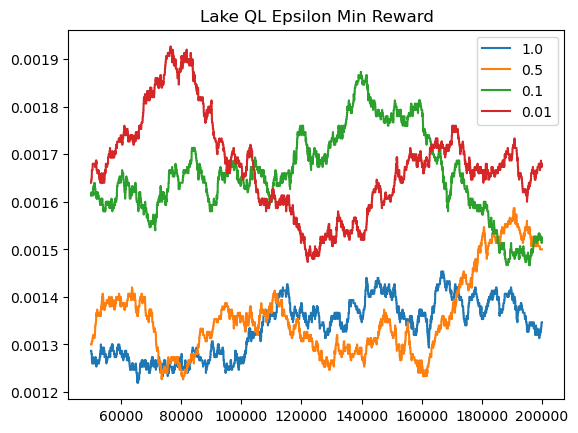

In [235]:
reward_df.rolling(50000).mean().plot(title='Lake QL Epsilon Min Reward')
plt.savefig('lakeqlepsilonminreward.png', format='png')

1


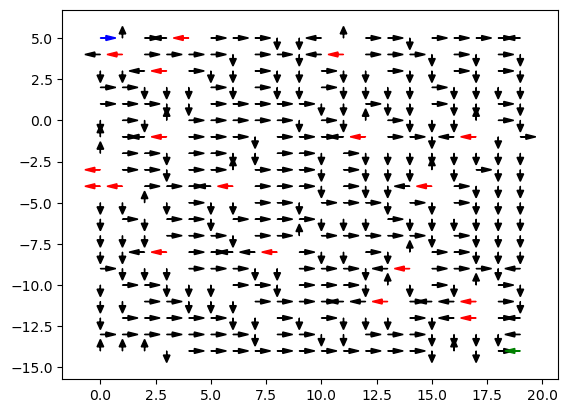

0.5


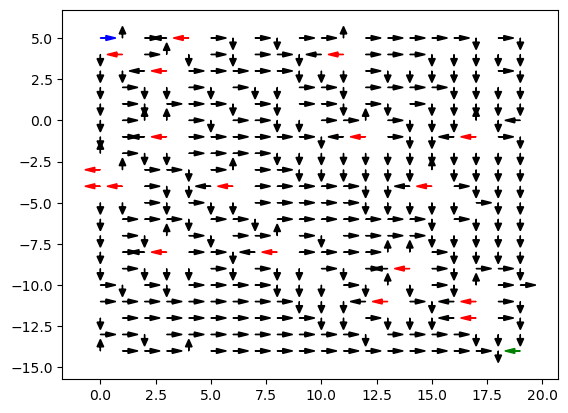

0.1


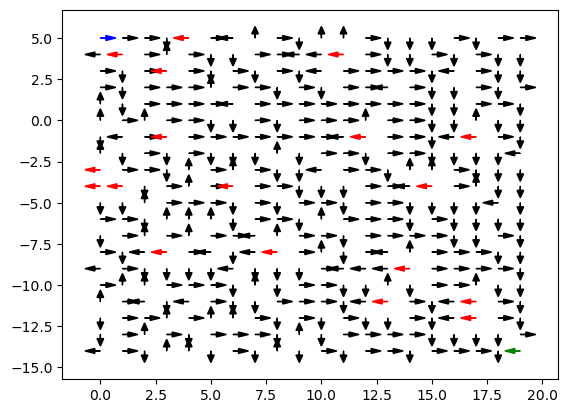

0.01


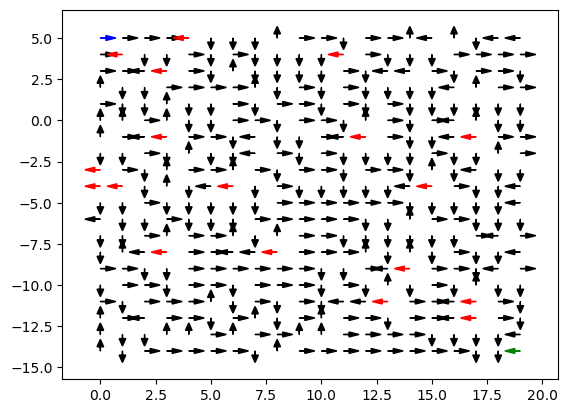

In [236]:
for value, policy in zip(index, policies):
    print(value)
    visualize_policy(policy, 20, random_map, f'lakevqlepsilonmin_{value}.png')

#### Intermittent Iteration Evaluation

In [237]:
iterations = [10000, 20000, 50000, 100000, 200000, 1000000]
ql_results = []

for max_iteration in iterations:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.1,
        epsilon=.33,
        epsilon_min=.5,
        epsilon_decay=.9999,
        n_iter=max_iteration,
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    print(time.time() - start)
    ql_results.append(ql)

1.1395294666290283
2.1224374771118164
5.360204458236694
10.680297136306763
21.59114122390747
107.69783902168274


10000


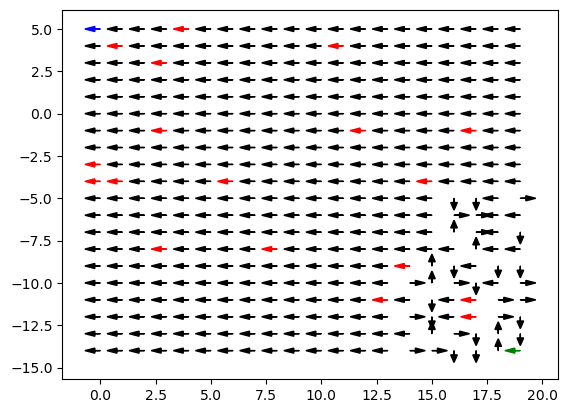

20000


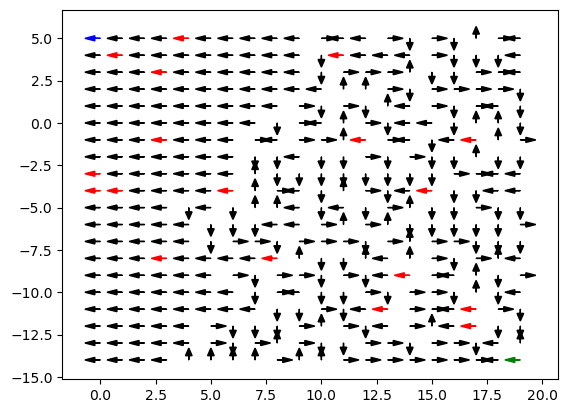

50000


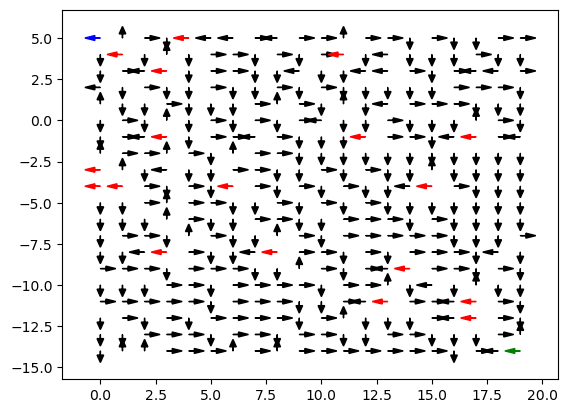

100000


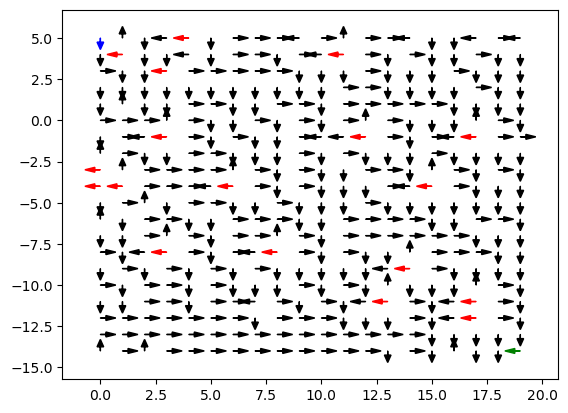

200000


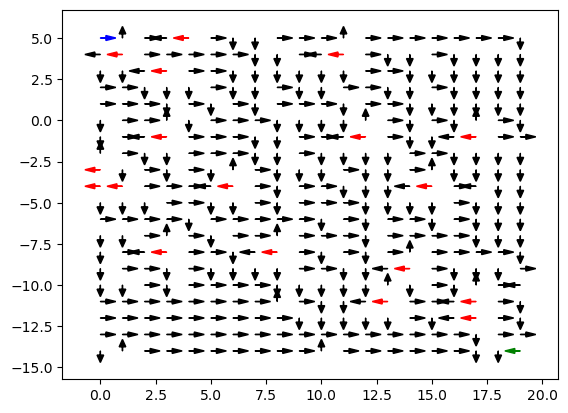

1000000


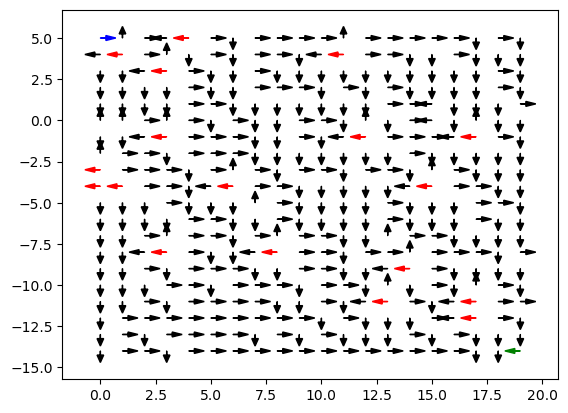

In [238]:
for value, ql_run in zip(iterations, ql_results):
    print(value)
    visualize_policy(ql_run.policy, 20, random_map, f'lakeqlintermittent_{value}.png')

#### Policy Average Steps 

In [239]:
ql = mdp.mdp.QLearning(
    P, 
    R, 
    .95,
    alpha=.9,
    alpha_decay=.99997,
    alpha_min=.01,
    epsilon=.33,
    epsilon_min=.5,
    epsilon_decay=.9999,
    n_iter=200000, 
    run_stat_frequency=1,
    iter_callback=callback
)
start = time.time()
ql.run()
print(time.time() - start)

21.340831518173218


In [240]:
pd.Series([run_simulation(ql.policy, env) for i in range(5)]).mean()

904.8

# Large Problem

In [49]:
actions = ['L', 'D', 'R', 'U']
random_map = generate_random_map(size=100, p=.95)

P, R = mdp.example.openai('FrozenLake-v1', render=False, desc=random_map, is_slippery=True)
env = gym.make('FrozenLake-v1', desc=random_map, render_mode='human', is_slippery=True)

In [50]:
plot_df = pd.DataFrame(index=range(200))
start = time.time()
vi = mdp.mdp.ValueIteration(P, R, .9, max_iter=1000000, epsilon=.000001)
print(time.time() - start)
results = vi.run()

vi_mean_v = [x['Mean V'] for x in results]
vi_error = [x['Error'] for x in results]
vi_time = [x['Time'] for x in results]

3.0540192127227783


<AxesSubplot:>

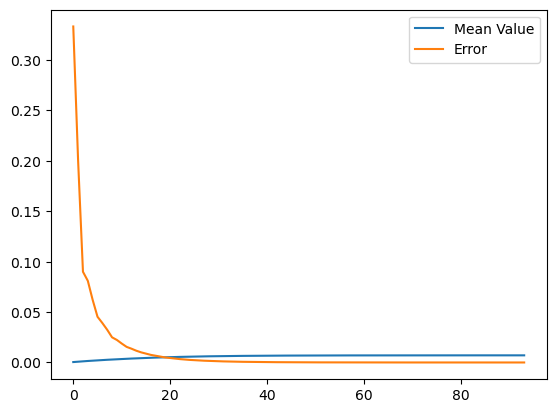

In [38]:
plot_df['Mean Value'] = pd.Series(vi_mean_v)
plot_df['Error'] = pd.Series(vi_error)
plot_df.plot()

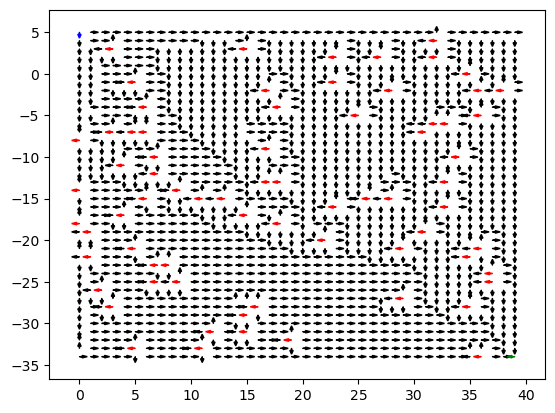

In [39]:
visualize_policy(vi.policy, 40, random_map)

<AxesSubplot:>

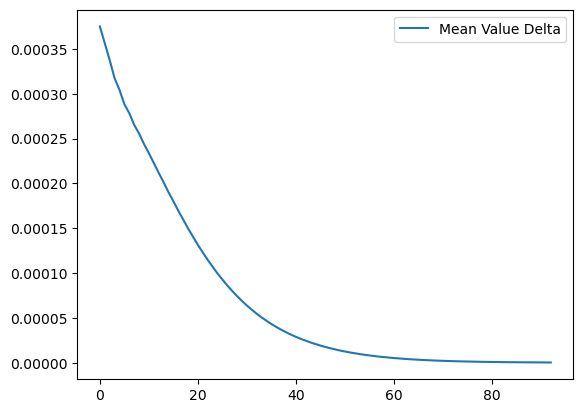

In [40]:
plot_df = pd.DataFrame(index=range(200))

plot_df['Mean Value'] = pd.Series(vi_mean_v)
plot_df['Error'] = pd.Series(vi_error)
plot_df['Mean Value Delta'] = plot_df['Mean Value'].diff().shift(-1)
plot_df = plot_df.drop(['Mean Value', 'Error'], axis=1)
plot_df.plot()

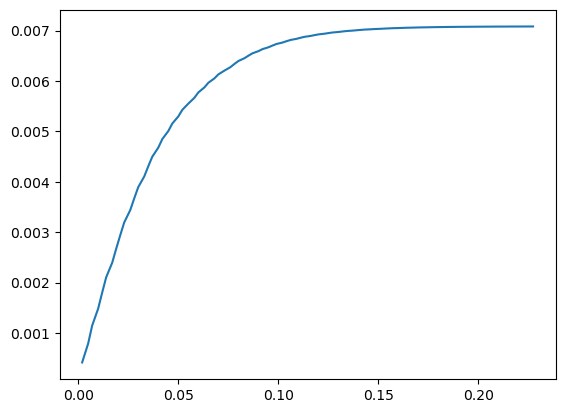

In [41]:
plot_df = pd.DataFrame(index=range(200))

plt.plot(vi_time, vi_mean_v)

#### Gamma Experiments

In [42]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))

times = []

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    times.append([x['Time'] for x in results])

<AxesSubplot:>

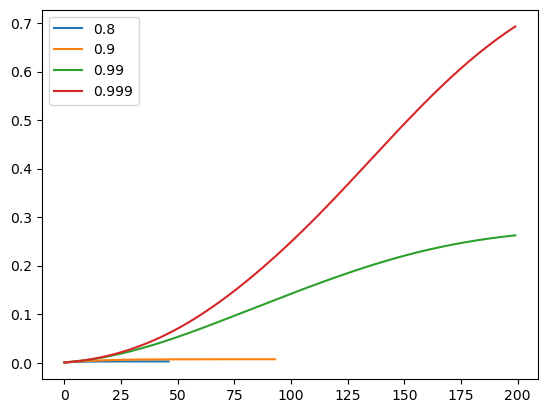

In [43]:
plot_df.plot()

In [44]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    plot_df[f'{i} Delta'] = plot_df[i].diff().shift(-1)
    plot_df = plot_df.drop([i], axis=1)

<AxesSubplot:>

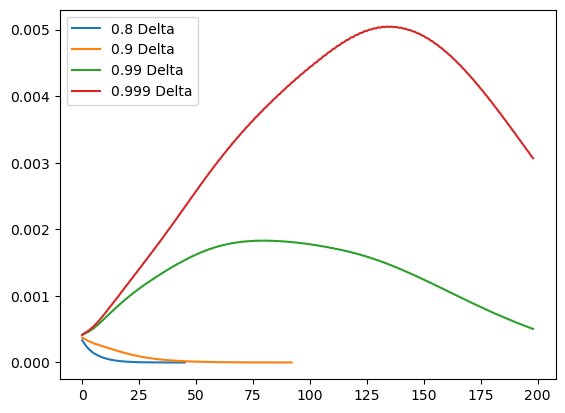

In [45]:
plot_df.plot()

In [49]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))

times = []

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Reward'] for x in results])
    times.append([x['Time'] for x in results])

<AxesSubplot:>

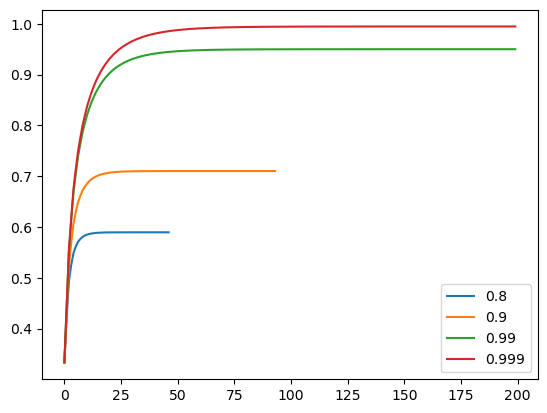

In [50]:
plot_df.plot()

#### Policy Visualization

In [111]:
env.reset()
env.render()
new_state=0
for i in range(1000):
    action = vi.policy[new_state]
    print('Desired Action:', actions[action])
    new_state, reward, done, other, info = env.step(action)
    print(new_state)
    print(reward)
    env.render()
    if done:
        break

Desired Action: D
4
0.0
Desired Action: D
8
0.0
Desired Action: D
12
0.0
Desired Action: R
13
0.0
Desired Action: R
14
0.0
Desired Action: R
15
1.0


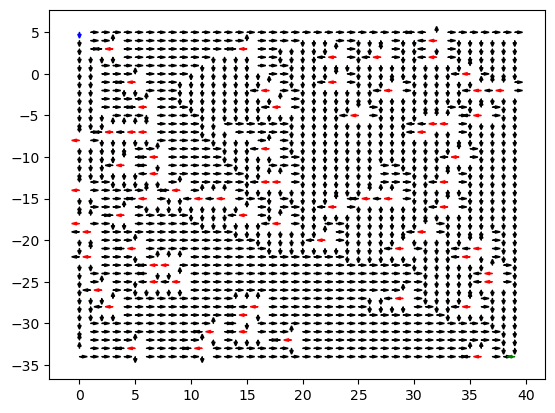

In [48]:
visualize_policy(vi.policy, 40, random_map)

#### Policy Average Steps

In [331]:
vi = mdp.mdp.ValueIteration(P, R, .999, max_iter=100000, epsilon=.000001)
vi.run()
results = [run_simulation(vi.policy, env) for i in range(10)]
print(np.mean([x[0] for x in results]))
print(np.sum([x[1] for x in results]))

307.6

### Policy Iteration

In [51]:
plot_df = pd.DataFrame(index=range(20))
start = time.time()
pi = mdp.mdp.PolicyIteration(P, R, .9, max_iter=200)
print(time.time() - start)
results = pi.run()

pi_mean_v = [x['Mean V'] for x in results]
pi_error = [x['Error'] for x in results]
pi_time = [x['Time'] for x in results]

0.6926290988922119


<AxesSubplot:>

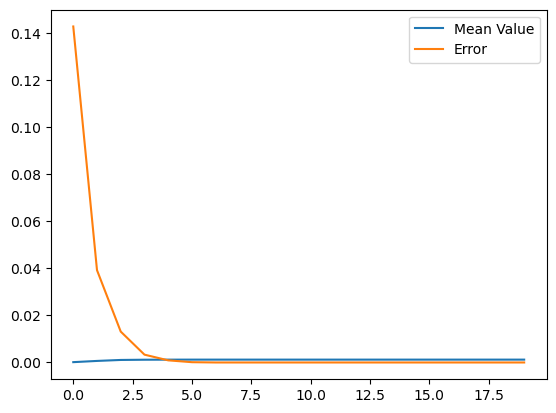

In [52]:
plot_df['Mean Value'] = pd.Series(pi_mean_v)
plot_df['Error'] = pd.Series(pi_error)
plot_df.plot()

<AxesSubplot:>

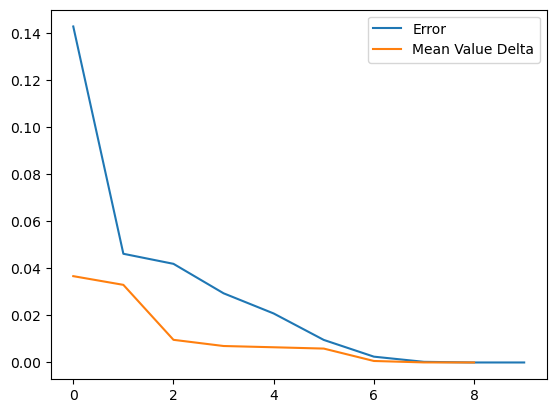

In [144]:
plot_df['Mean Value'] = pd.Series(pi_mean_v)
plot_df['Mean Value Delta'] = plot_df['Mean Value'].diff().shift(-1)
plot_df = plot_df.drop(['Mean Value'], axis=1)
plot_df.plot()

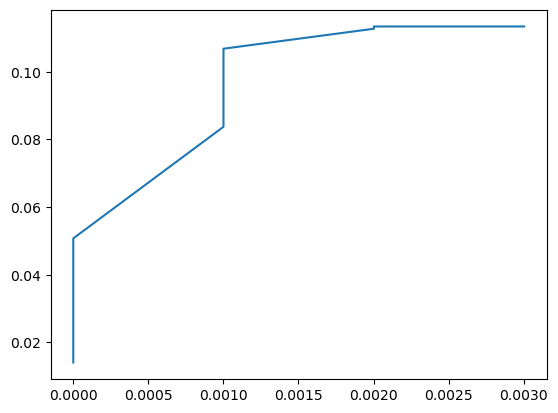

In [146]:
time = [x['Time'] for x in results]
mean_v = [x['Mean V'] for x in results]

plt.plot(pi_time, pi_mean_v)

#### Gamma Experiments

In [411]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(20))

times = []

for i in index:
    vi = mdp.mdp.PolicyIteration(P, R, i, max_iter=200)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    times.append([x['Time'] for x in results])

<AxesSubplot:>

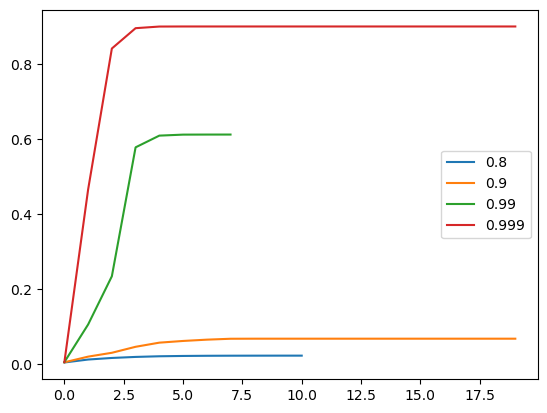

In [412]:
plot_df.plot()

In [413]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(20))

for i in index:
    vi = mdp.mdp.PolicyIteration(P, R, i, max_iter=200)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    plot_df[f'{i} Delta'] = plot_df[i].diff().shift(-1)
    plot_df = plot_df.drop([i], axis=1)

<AxesSubplot:>

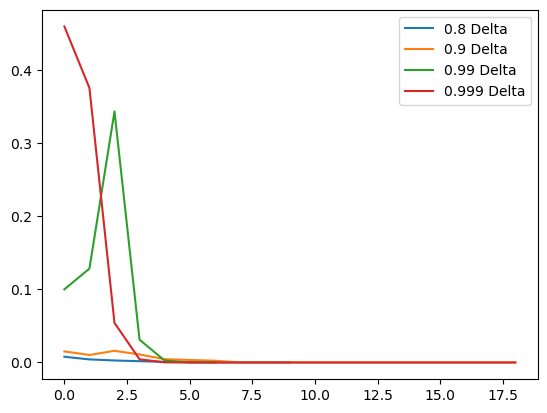

In [414]:
plot_df.plot()

#### Policy Visualization

In [148]:
env.reset()
env.render()
new_state=0
for i in range(1000):
    action = pi.policy[new_state]
    print('Desired Action:', actions[action])
    new_state, reward, done, other, info = env.step(action)
    print(new_state)
    print(reward)
    env.render()
    if done:
        break

Desired Action: D
10
0.0
Desired Action: D
20
0.0
Desired Action: D
30
0.0
Desired Action: D
40
0.0
Desired Action: D
40
0.0
Desired Action: D
40
0.0
Desired Action: D


KeyboardInterrupt: 

In [ ]:
ar = np.reshape([actions[x] for x in vi.policy], (10, 10))

In [ ]:
arrows = {"R":(1,0), "L":(-1,0),"U":(0,1),"D":(0,-1)}
scale = 0.25
for r, row in enumerate(ar):
    for c, cell in enumerate(row):
        plt.arrow(c, 5-r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)

#### Policy Average Steps

In [334]:
pi = mdp.mdp.PolicyIteration(P, R, .999, max_iter=10)
pi.run()
results = [run_simulation(pi.policy, env) for i in range(10)]
print(np.mean([x[0] for x in results]))
print(np.sum([x[1] for x in results]))

322.5

### Q Learning

In [224]:
def callback(s, a, s_new):
    global i
    if i % 1000 == 0:
        print(i, s, a, s_new)
    i += 1
    return True

In [496]:
i = 0
plot_df = pd.DataFrame(index=range(100000000))
start = time.time()
ql = mdp.mdp.QLearning(
    P,
    R,
    .95,
    alpha=.9,
    alpha_decay=.99999,
    alpha_min=.1,
    epsilon=.8,
    epsilon_min=.05,
    epsilon_decay=.99999,
    n_iter=10000000,
    run_stat_frequency=1,
    iter_callback=callback
)
results = ql.run()
print(time.time() - start)

print(sys.getsizeof(ql))

print('Mean Value:', results[-1]['Mean V'])

ql_reward = [x['Reward'] for x in results]
ql_mean_v = [x['Mean V'] for x in results]
ql_error = [x['Error'] for x in results]
ql_time = [x['Time'] for x in results]

476.07213735580444
48
Mean Value: 0.21899049258495928


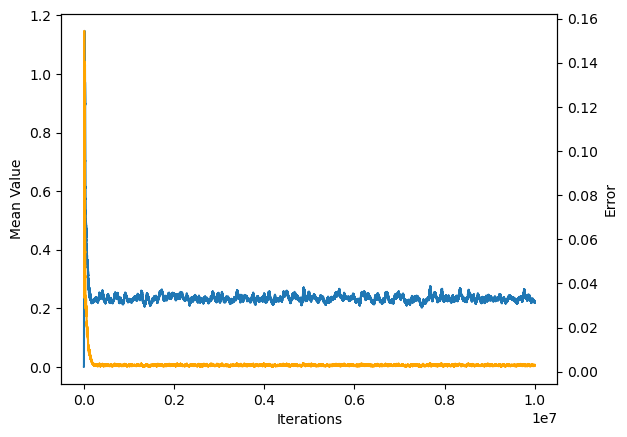

In [497]:
plot_df['Mean Value'] = pd.Series(ql_mean_v)
plot_df['Error'] = pd.Series(ql_error).rolling(2000).mean()

fig, ax = plt.subplots()
ax.plot(plot_df['Mean Value'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean Value')

ax2 = ax.twinx()
ax2.plot(plot_df['Error'], color='orange')
ax2.set_ylabel('Error')
plt.show()

In [498]:
visualize_policy(ql.policy, 40, random_map)

ValueError: cannot reshape array of size 100 into shape (40,40)

In [ ]:
env.reset()
env.render()
new_state=0
for i in range(1000):
    action = ql.policy[new_state]
    print('Desired Action:', actions[action])
    new_state, reward, done, other, info = env.step(action)
    print(new_state)
    print(reward)
    env.render()
    if done:
        break

In [ ]:
env.close()